In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import RandomizedSearchCV
import graphviz

In [15]:
data = pd.read_csv('data.csv')

In [16]:
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [18]:
dummy = pd.get_dummies(data,columns = ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia'])

In [19]:
scale  = MinMaxScaler()
scale.fit(dummy)
sc = scale.transform(dummy)
scd = pd.DataFrame(sc)

In [20]:
scd.columns = dummy.columns

In [21]:
scd

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_0,gender_1,chest_pain_0,chest_pain_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.396947,0.032258,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,0.333333,0.150943,0.315068,0.465649,0.193548,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,0.812500,0.471698,0.152968,0.534351,0.548387,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,0.583333,0.339623,0.011416,0.335878,0.193548,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
y = scd['target']
x = scd.drop('target',axis=1)

In [23]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size = 0.2)

In [24]:
tree = DecisionTreeClassifier(criterion='entropy',splitter='best',max_features=13).fit(trainx,trainy)

In [25]:
tree.score(testx,testy)

0.7540983606557377

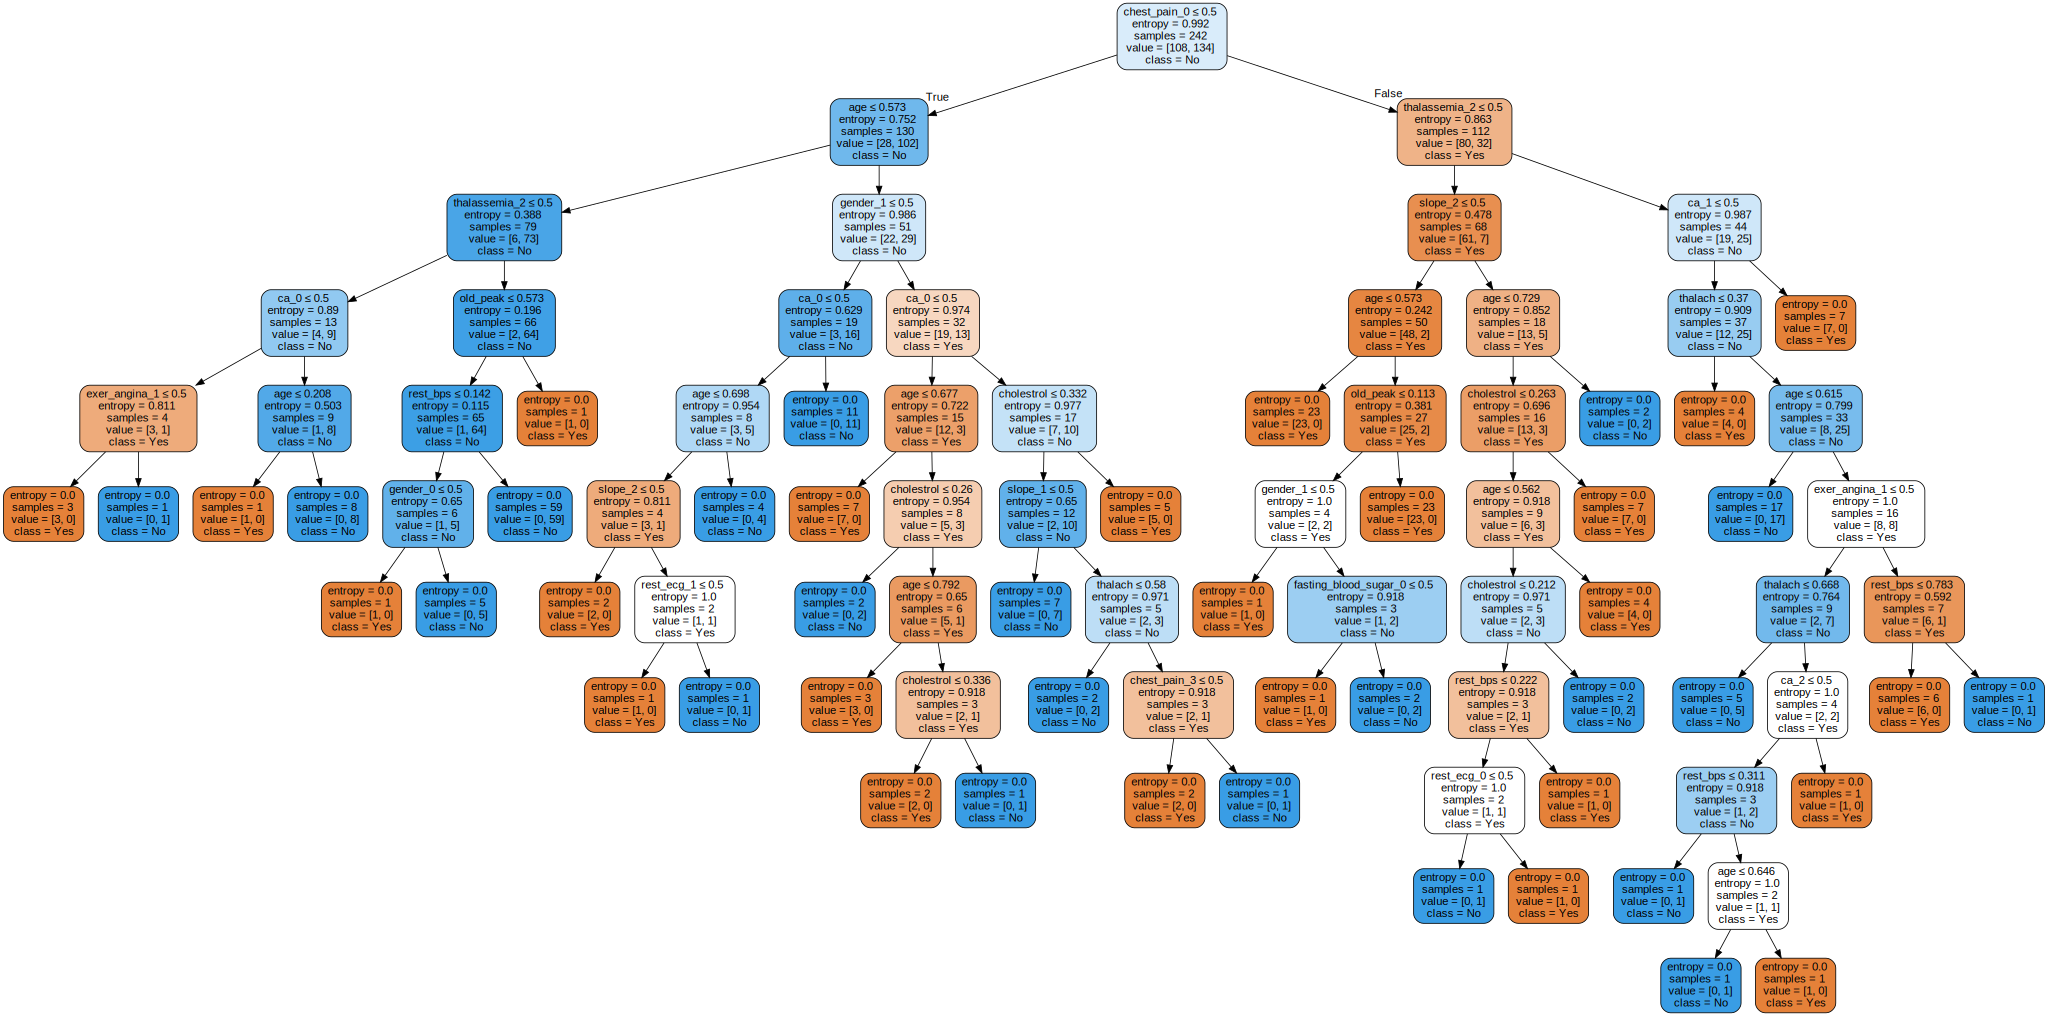

In [26]:
dot_data = export_graphviz(tree,   
                      out_file=None, 
                      feature_names=x.columns,       #Provide X Variables Column Names 
                      class_names=['Yes','No'],      # Provide Target Variable Column Name
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 